**PROYECTO DE PREDICCIÓN CHURN TELCO**





1. DECLARACION DEL PROBLEMA

1.1 INTRODUCCION

Resumen del proyecto: Análisis de la Rotación de Clientes en Compañías Telefónicas

El presente proyecto se enfoca en estudiar y comprender la rotación de clientes en compañías telefónicas. La rotación de clientes se refiere a la pérdida de clientes o suscriptores de una empresa, ya sea por decisión voluntaria del cliente de buscar otro proveedor de servicios o debido a causas involuntarias, como factores naturales que impiden que el cliente continúe con sus suscripciones.

En el contexto empresarial, es ampliamente conocido que retener clientes existentes suele ser más económico que adquirir nuevos clientes. Por esta razón, las compañías telefónicas invierten significativas sumas de dinero para explorar las posibles razones y causas que llevan a los clientes a abandonar sus servicios.

Este proyecto tiene como objetivo analizar los distintos tipos de clientes y comprender cómo se desarrolla el proceso de suscripción, ya que esto puede tener un impacto significativo en el estado futuro de los clientes a largo plazo. Mediante un análisis exhaustivo, se buscará identificar los factores clave que influyen en la rotación de clientes en las compañías telefónicas.

Para lograr este objetivo, se examinarán detalladamente los motivos que llevan a los clientes a optar por otras alternativas y cómo estos factores varían según el tipo de cliente. Asimismo, se estudiarán las estrategias de retención que implementan las compañías telefónicas para mantener a sus clientes satisfechos y comprometidos.

Mediante este proyecto, se espera proporcionar información valiosa a las compañías telefónicas para que puedan tomar decisiones más informadas en cuanto a la retención de clientes. Al comprender mejor las causas de la rotación de clientes, las empresas podrán desarrollar estrategias más efectivas para fomentar la lealtad de los clientes y, en última instancia, mejorar su rentabilidad y éxito en el mercado.

1.2 OBJETIVOS

Este proyecto tiene como objetivo responder a las siguientes preguntas:

¿Qué porcentaje de clientes abandonan el servicio (churn) y cuántos continúan utilizando los servicios activamente?

¿Existen patrones en la rotación de clientes basados en el género?

¿Existen patrones o preferencias en la rotación de clientes según el tipo de servicio proporcionado?

¿Cuáles son los tipos de servicio más rentables?

¿Qué características y servicios son los más rentables?

¿Qué características tienen un mayor impacto en la predicción de la rotación de clientes?

¿Qué modelo es el mejor para predecir la rotación de clientes?

A través de este proyecto, se analizarán los datos relacionados con la rotación de clientes para obtener respuestas a estas preguntas y proporcionar información valiosa que pueda ayudar a mejorar la retención de clientes y la rentabilidad en el negocio.

1.3 CARACTERISTICAS DEL CONJUNTO DE DATOS

Customer ID: Un ID único que identifica a cada cliente.

Información demográfica sobre los clientes:

Gender (Género): Indica si el cliente es masculino o femenino.

SeniorCitizen (Ciudadano Senior): Indica si el cliente es una persona mayor o no (1, 0).

Partner (Pareja): Indica si el cliente tiene pareja o no (Yes, No).

Dependents (Dependientes): Indica si el cliente tiene dependientes o no (Yes, No).


Servicios que cada cliente ha contratado:

PhoneService (Servicio telefónico): Indica si el cliente tiene servicio telefónico o no (Yes, No).

MultipleLines (Múltiples líneas): Indica si el cliente tiene múltiples líneas o no (Yes, No, No phone service).

InternetService (Servicio de Internet): Proveedor de servicio de Internet del cliente (DSL, Fibra óptica, No).

OnlineSecurity (Seguridad en línea): Indica si el cliente tiene seguridad en línea o no (Yes, No, No internet service).

OnlineBackup (Respaldo en línea): Indica si el cliente tiene respaldo en línea o no (Yes, No, No internet service).

DeviceProtection (Protección de dispositivo): Indica si el cliente tiene protección de dispositivo o no (Yes, No, No internet service).

TechSupport (Soporte técnico): Indica si el cliente tiene soporte técnico o no (Yes, No, No internet service).

StreamingTV (Televisión por streaming): Indica si el cliente tiene televisión por streaming o no (Yes, No, No internet service).

StreamingMovies (Películas por streaming): Indica si el cliente tiene películas por streaming o no (Yes, No, No internet service).


Información de la cuenta del cliente:

Tenure (Permanencia): Número de meses que el cliente ha estado con la compañía.

Contract (Contrato): El plazo del contrato del cliente (Month-to-month, One year, Two year).

PaperlessBilling (Facturación sin papel): Indica si el cliente tiene facturación sin papel o no (Yes, No).

PaymentMethod (Método de pago): El método de pago del cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

MonthlyCharges (Cargos mensuales): La cantidad cobrada al cliente mensualmente.

TotalCharges (Cargos totales): La cantidad total cobrada al cliente.

Churn (Rotación): Objetivo, indica si el cliente ha abandonado la compañía en el último mes o no (Yes, No).

2. IMPORTAR LAS LIBRERIAS Y LA DATA

In [1]:
# Manejar datos y matrices similares a tablas
import pandas as pd
import numpy as np

# VISUALIZACION
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

# PREPROCESAMIENTO
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# BALANCE DE LA DATA

# MODELOS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier

# EVALUACION
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

# Mostrar el número total de columnas presentes en el conjunto de datos
pd.set_option('display.max_columns', None)

In [2]:
# Puede acceder a los datos en la plataforma Kaggle: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
# Importar la data y remplazar valores faltantes con NaN
df =pd.read_csv('Churn.csv',na_values=' ')

3. MANEJO DE VALORES FALTANTES

Busquemos si tenemos valores faltantes en el conjunto de datos.

In [ ]:
# El código reemplaza todas las ocurrencias de valores en blanco en el DataFrame con el valor NaN, si ya se aplico na_values=' ', ya no es necesario por que ya se aplico cuando se creo el DF.
#df = df.replace(r'^\s*$', np.nan, regex=True)


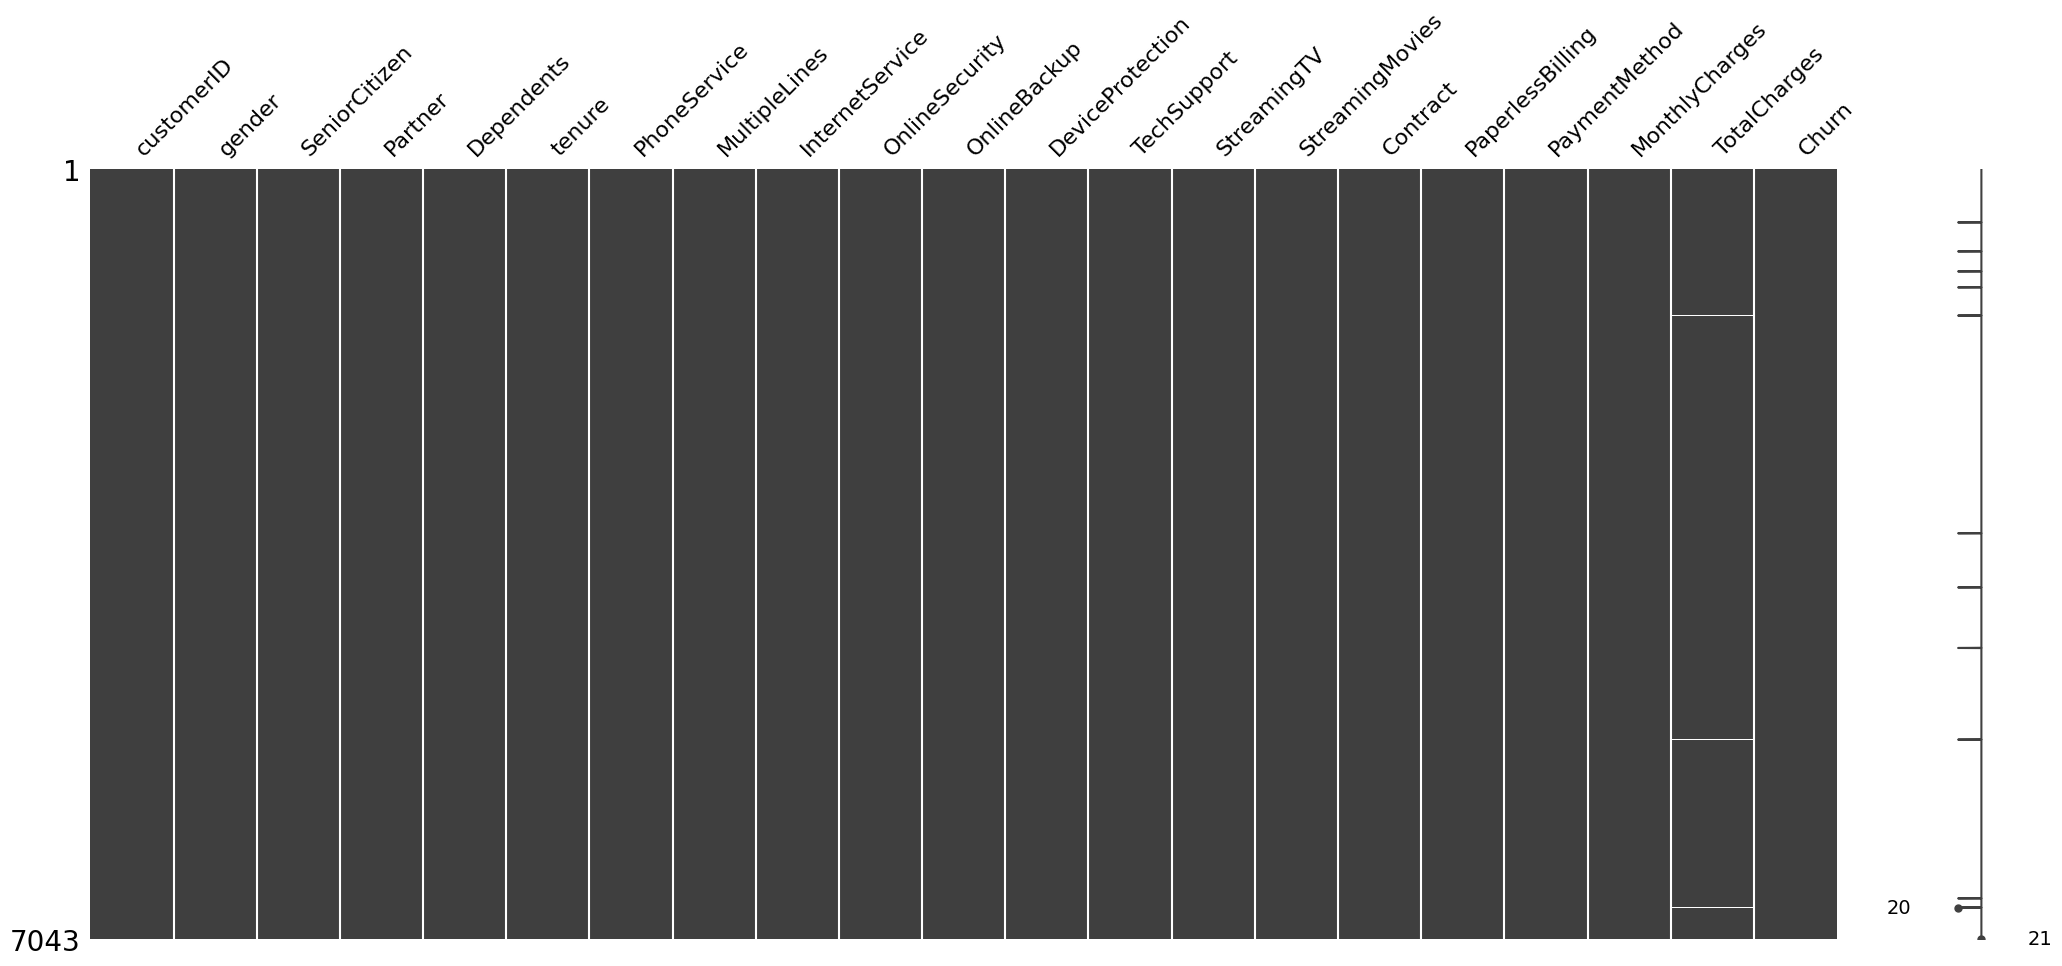

In [ ]:
#Diagrama de matriz que visualiza los valores que faltan en un DataFrame.
msno.matrix(df);

In [ ]:
# Es un comando que se utiliza para contar la cantidad de valores nulos (NaN) en cada columna de un DataFrame
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Los datos tienen 11 valores faltantes en la columna TotalCharges

In [ ]:
# visualización de las primeras filas de los datos, los que nos permite comprender su estructura.
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Elegir estrategia para subsanar los valores faltantes:
1) Eliminacion de Filas o Colummnas
2) Imputacion de valores
3) Crear indicadores de valores faltantes

In [3]:
#Se elige la estrategia 2, la imputación para manejar los valores faltantes en la columna 'TotalCharges'.
#Se Calcula un cargo total estimado para las filas en las que faltan valores de "TotalCharges" en función de la cantidad de meses (Ternure) que el cliente ha estado con la empresa y su cargo mensual(MonthlyCharges).
#Esta estrategia asume que los cargos totales se pueden aproximar por el producto de la tenencia y los cargos mensuales.

ind = df[df['TotalCharges'].isnull()].index.tolist()
for i in ind:
    df.loc[i, 'TotalCharges'] = int(np.maximum(df.loc[i, 'tenure'], 1)) * df.loc[i, 'MonthlyCharges']


El fragmento de código realiza las siguientes acciones:

Identifica filas en el DataFrame df donde la columna 'TotalCharges' tiene valores faltantes (NaN).
Obtiene las etiquetas de índice de estas filas y las almacena en la lista ind.
Luego itera a través de cada índice en la lista ind.
Para cada índice i, calcula un valor estimado para 'TotalCharges' usando la fórmula: tenure * MonthlyCharges, donde tenure es el valor en la columna 'tenure' y MonthlyCharges es el valor en la columna 'MonthlyCharges'. La np.maximum()función asegura que el valor de 'tenencia' sea al menos 1 para evitar una multiplicación por 0.
Asigna el valor calculado a la columna 'TotalCharges' para la fila correspondiente usando el .loc[] indexador.

In [ ]:
#Lista de nombres de columna del DataFrame el cual el tipo de datos es numérico (num_vars).
#num_vars = [c for c in df if pd.api.types.is_numeric_dtype(df[c])]

#reemplazar datos faltantes con la mediana (opcional estrategia 1)
# 1. Obtenemos la mediana de la columna y la almacenamos en un diccionario.
#na_dict = df[num_vars].median().to_dict()
# 2. Creamos una columna que indique si hay data faltante.
#df['TotalCharges_na'] = df['TotalCharges'].isna()
# 3. Reemplazamos los datos faltantes con la mediana obtenida.
#df.TotalCharges.fillna(na_dict['TotalCharges'], inplace=True)
#df[num_vars].isna().sum()

In [ ]:
# Se visualiza que no se encuentran valores faltantes.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#Veremos si hay filas duplicadas
df.duplicated().sum()

0

In [ ]:
# Se mantiene el numero de filas y columnas de mi DF original.
df.shape

(7043, 21)

In [ ]:
#Que tipo de variables son.
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**PRE-PROCESAMIENTO DE LA DATA**

In [ ]:
#Observo la cantidad de categorias que tiene cada columna.
for i in df.columns[6:-3]:
  print(f'Number of categories in the variable {i}: {len(df[i].unique())}')

Number of categories in the variable PhoneService: 2
Number of categories in the variable MultipleLines: 3
Number of categories in the variable InternetService: 3
Number of categories in the variable OnlineSecurity: 3
Number of categories in the variable OnlineBackup: 3
Number of categories in the variable DeviceProtection: 3
Number of categories in the variable TechSupport: 3
Number of categories in the variable StreamingTV: 3
Number of categories in the variable StreamingMovies: 3
Number of categories in the variable Contract: 3
Number of categories in the variable PaperlessBilling: 2
Number of categories in the variable PaymentMethod: 4


In [ ]:
#Explorancion de los datos, tipos de variables y estadisticos descriptivos.
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


**Detección de outliers**

Los valores atípicos pueden afectar negativamente el rendimiento de muchos algoritmos de aprendizaje automático. Los valores atípicos pueden sesgar las medidas estadísticas y las distribuciones de datos, lo que genera resultados engañosos.


In [ ]:
# Eliminamos customerID, dado que no proporciona información relevante para nuestro modelo y análisis.
df=df.drop(labels=['customerID'],axis=1)

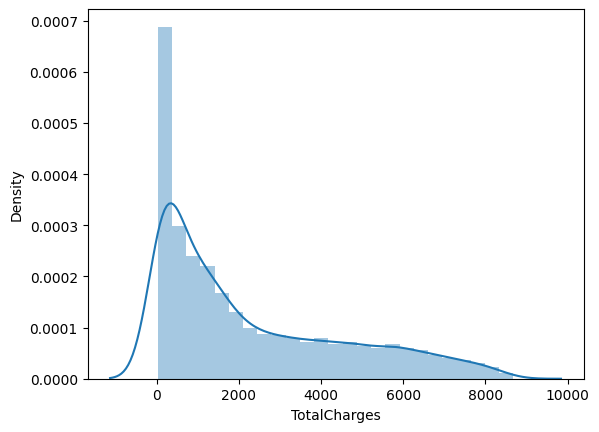

In [ ]:
sns.distplot(df.TotalCharges);

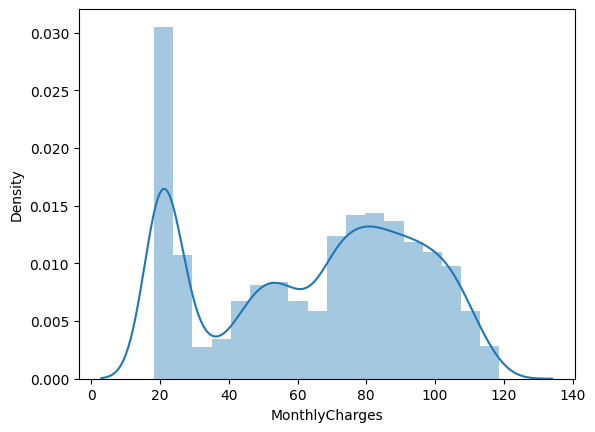

In [ ]:
sns.distplot(df.MonthlyCharges);

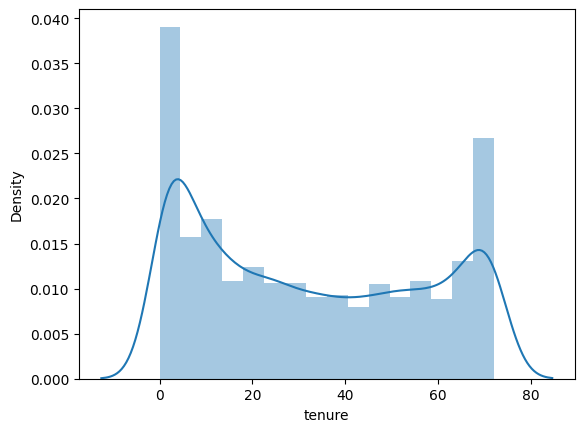

In [ ]:
sns.distplot(df.tenure);

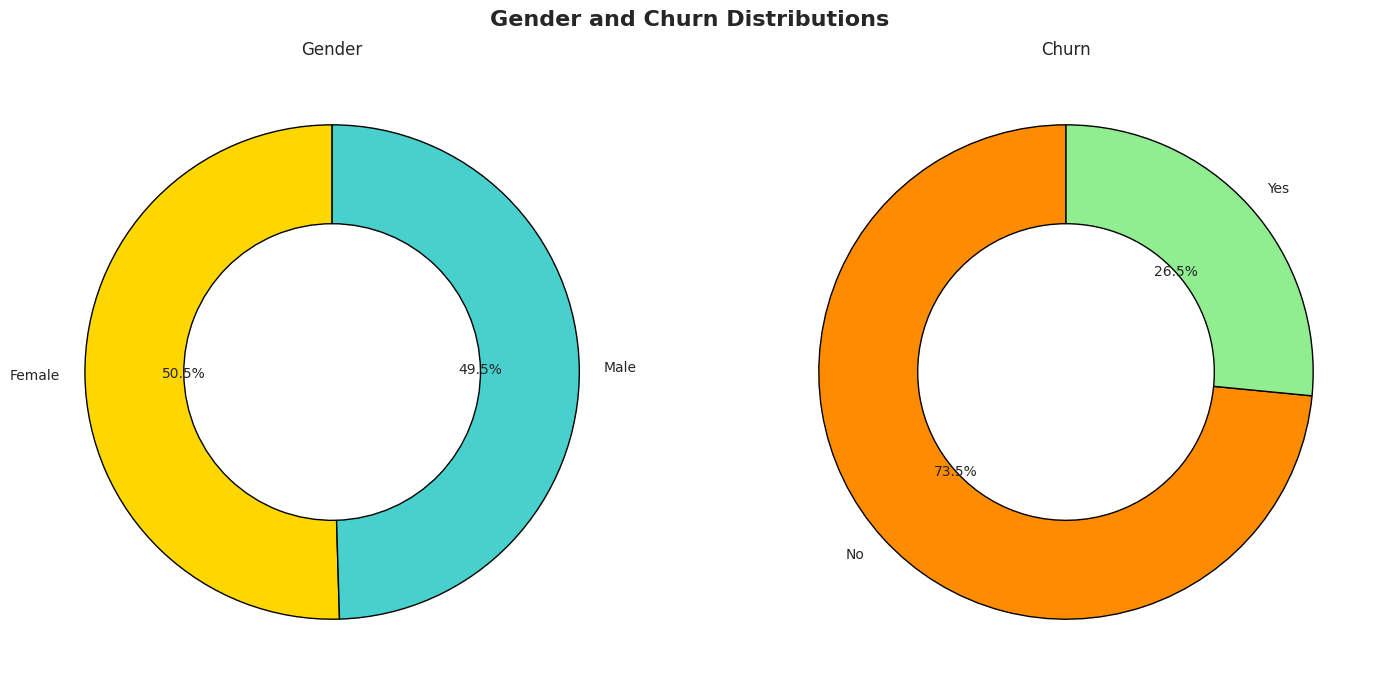

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suponiendo que ya tienes el DataFrame "data" cargado

# Definir los datos para cada pie chart
labels_gender = df['gender'].unique()
sizes_gender = df['gender'].value_counts()

labels_churn = df['Churn'].unique()
sizes_churn = df['Churn'].value_counts()

colors_gender = ['gold', 'mediumturquoise']
colors_churn = ['darkorange', 'lightgreen']

# Crear la figura y los ejes
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Dibujar el primer pie chart (Gender)
ax[0].pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90,
          autopct='%1.1f%%', wedgeprops=dict(width=0.4, edgecolor='black'))
ax[0].set_title('Gender')

# Dibujar el segundo pie chart (Churn)
ax[1].pie(sizes_churn, labels=labels_churn, colors=colors_churn, startangle=90,
          autopct='%1.1f%%', wedgeprops=dict(width=0.4, edgecolor='black'))
ax[1].set_title('Churn')

# Título central
fig.suptitle('Gender and Churn Distributions', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

Tenemos datos desbalanceados
 - El 26.6% de los clientes cambiaron a otra compañía.

 - Los clientes son 49.5% mujeres y 50.5% hombres.

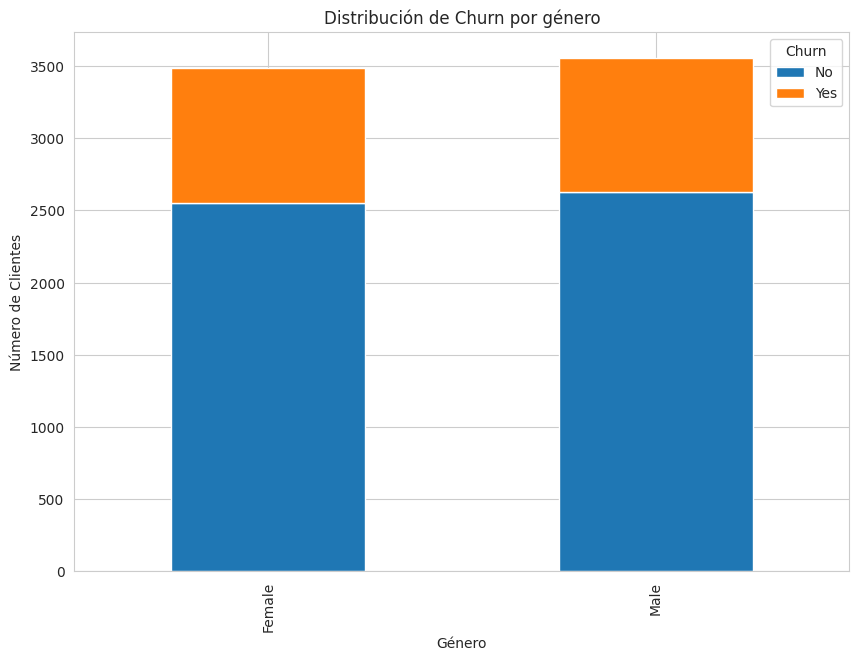

In [ ]:
# Construir la tabla de contingencia
contingency_table = pd.crosstab(df['gender'], df['Churn'])

# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Distribución de Churn por género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.show()

In [ ]:
print(f'Una cliente femenina tiene una probabilidad del {round(df[(df["gender"] == "Female") & (df["Churn"] == "Yes")].count()[0] / df[(df["gender"] == "Female")].count()[0] *100,2)} % abandonar')

print(f'Un cliente masculino tiene una probabilidad {round(df[(df["gender"] == "Male") & (df["Churn"] == "Yes")].count()[0] / df[(df["gender"] == "Male")].count()[0]*100,2)} % abandonar')

Una cliente femenina tiene una probabilidad del 26.92 % abandonar
Un cliente masculino tiene una probabilidad 26.16 % abandonar


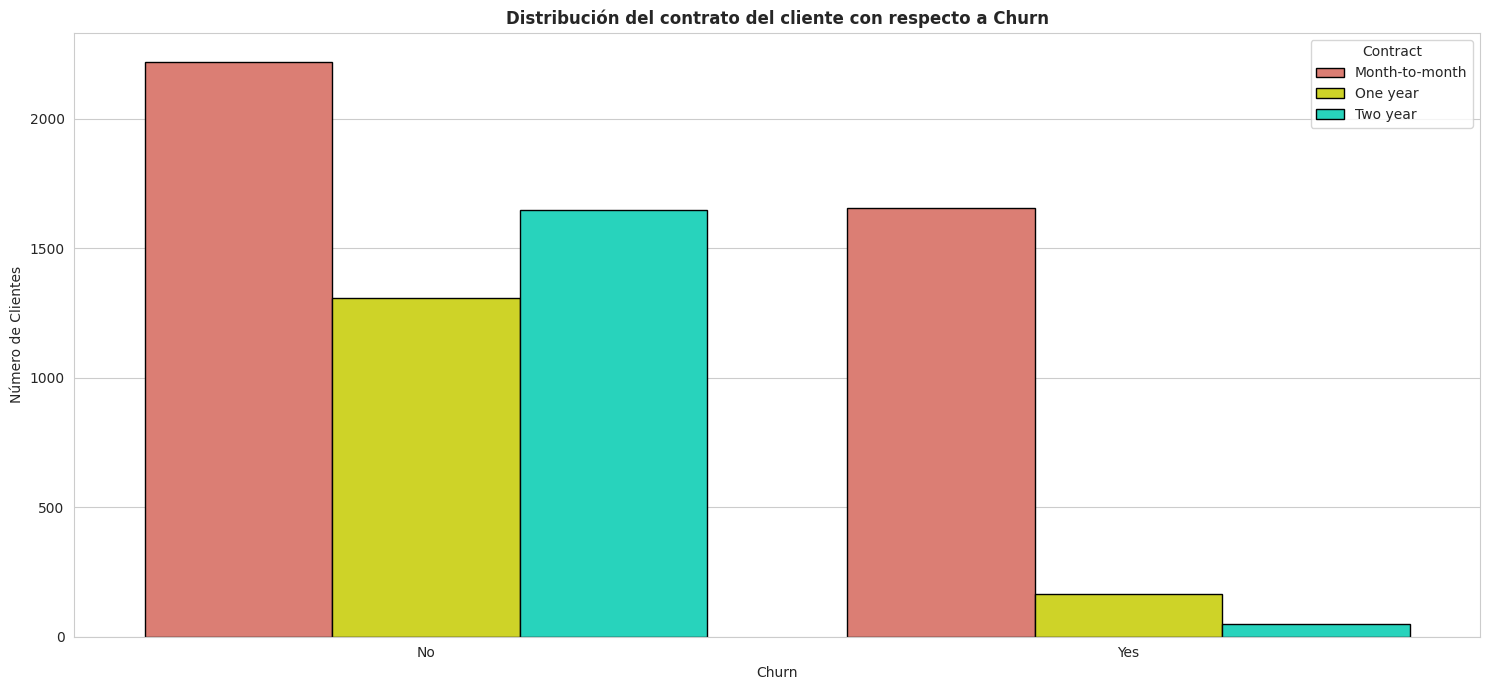

In [ ]:

# Establecer el estilo de seaborn
sns.set_style("whitegrid")

# Colores a utilizar
colors = ['#EC7063','#E9F00B','#0BF0D1']

# Crear la figura y el eje
plt.figure(figsize=(15, 7))

# Crear el histograma con seaborn
ax = sns.countplot(x='Churn', hue='Contract', data=df, palette=colors, edgecolor='black')

# Ajustar detalles de presentación
plt.title('Distribución del contrato del cliente con respecto a Churn', fontweight='bold')
plt.ylabel('Número de Clientes')
plt.xlabel('Churn')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
print(f'Un cliente con contrato de mes a mes tiene una probabilidad del {round(df[(df["Contract"] == "Month-to-month") & (df["Churn"] == "Yes")].count()[0] / df[(df["Contract"] == "Month-to-month")].count()[0] *100,2)} % abandonar')

print(f'Un cliente con contrato de un año tiene una probabilidad del {round(df[(df["Contract"] == "One year") & (df["Churn"] == "Yes")].count()[0] / df[(df["Contract"] == "One year")].count()[0]*100,2)} % abandonar')

print(f'Un cliente con contrato de dos años tiene una probabilidad del {round(df[(df["Contract"] == "Two year") & (df["Churn"] == "Yes")].count()[0] / df[(df["Contract"] == "Two year")].count()[0]*100,2)} % abandonar')

Un cliente con contrato de mes a mes tiene una probabilidad del 42.71 % abandonar
Un cliente con contrato de un año tiene una probabilidad del 11.27 % abandonar
Un cliente con contrato de dos años tiene una probabilidad del 2.83 % abandonar


Alrededor del 43% de los clientes con contrato mes a mes optaron por abandonar, en comparación con el 11% de los clientes con contrato de un año y el 3% con contrato de dos años. Una gran mayoría de las personas que abandonaron la empresa tienen contrato mes a mes. Esto es lógico, ya que las personas con contratos a largo plazo tienden a ser más leales a la empresa.

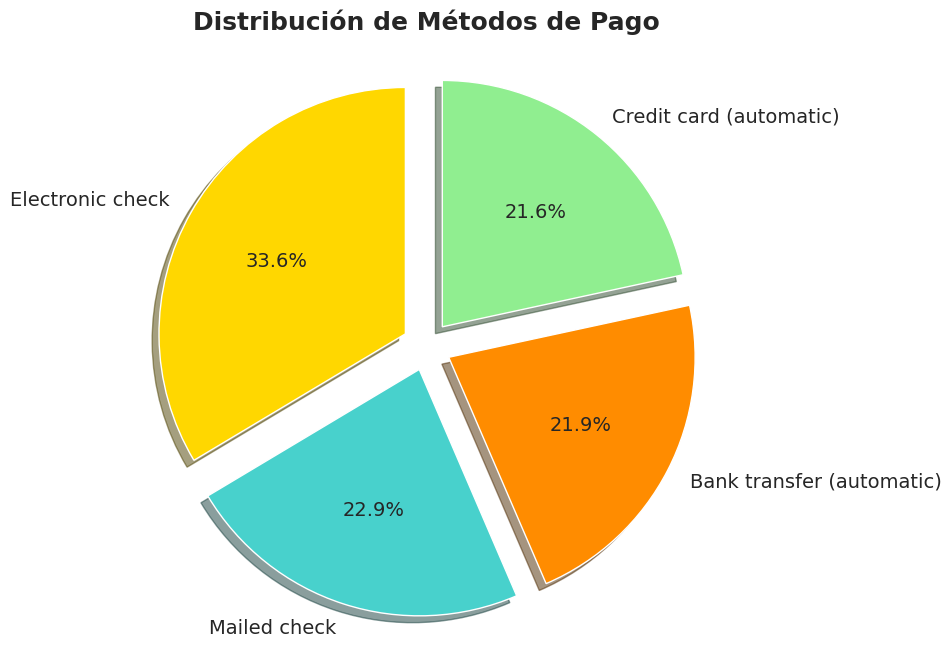

In [ ]:
# Datos
labels = df['PaymentMethod'].unique()
sizes = df['PaymentMethod'].value_counts()
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
explode = (0.1, 0.1, 0.1, 0.1)  # esto "explode" cada segmento un poco para separarlos

# Gráfico
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})

# Título
ax.set_title('Distribución de Métodos de Pago', fontweight='bold', size=18)

# Mostrar gráfico
plt.show()


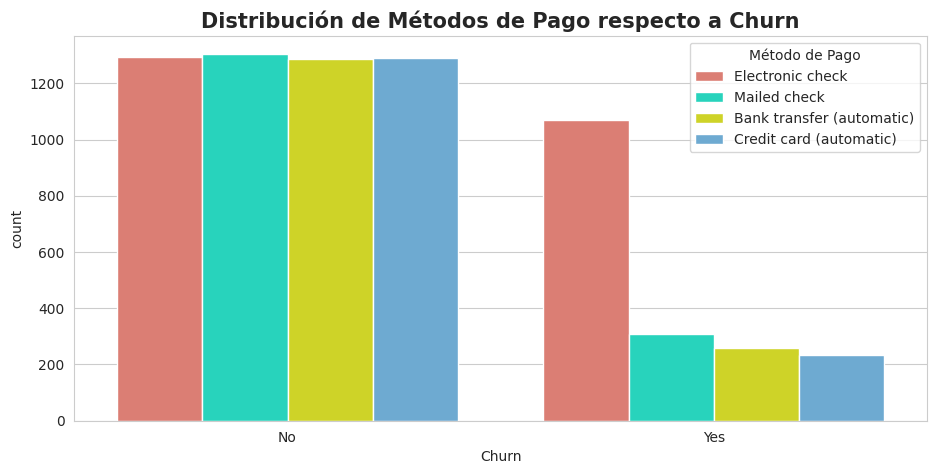

In [ ]:
# Configuración de tamaño y estilo
plt.figure(figsize=(11,5))
sns.set_style("whitegrid")

# Crear el histograma con barras agrupadas
sns.countplot(x='Churn', hue='PaymentMethod', data=df, palette=['#EC7063', '#0BF0D1', '#E9F00B', '#5DADE2'])

# Título y leyenda
plt.title('Distribución de Métodos de Pago respecto a Churn', fontweight='bold', size=15)
plt.legend(title='Método de Pago', loc='upper right')

# Mostrar el gráfico
plt.show()


In [ ]:
print(f'Un cliente que utiliza cheque electrónico como método de pago tiene una probabilidad del {round(df[(df["PaymentMethod"] == "Electronic check") & (df["Churn"] == "Yes")].count()[0] / df[(df["PaymentMethod"] == "Electronic check")].count()[0] *100,2)} % abandonar')

print(f'Un cliente que utiliza cheque por correo como método de pago tiene una probabilidad del {round(df[(df["PaymentMethod"] == "Mailed check") & (df["Churn"] == "Yes")].count()[0] / df[(df["PaymentMethod"] == "Mailed check")].count()[0]*100,2)} % abandonar')

print(f'Un cliente que utiliza transferencia bancaria automática como método de pago tiene una probabilidad del {round(df[(df["PaymentMethod"] == "Bank transfer (automatic)") & (df["Churn"] == "Yes")].count()[0] / df[(df["PaymentMethod"] == "Bank transfer (automatic)")].count()[0]*100,2)} % abandonar')

print(f'Un cliente que utiliza tarjeta de crédito automática como método de pago tiene una probabilidad del {round(df[(df["PaymentMethod"] == "Credit card (automatic)") & (df["Churn"] == "Yes")].count()[0] / df[(df["PaymentMethod"] == "Credit card (automatic)")].count()[0]*100,2)} % abandonar')

Un cliente que utiliza cheque electrónico como método de pago tiene una probabilidad del 45.29 % abandonar
Un cliente que utiliza cheque por correo como método de pago tiene una probabilidad del 19.11 % abandonar
Un cliente que utiliza transferencia bancaria automática como método de pago tiene una probabilidad del 16.71 % abandonar
Un cliente que utiliza tarjeta de crédito automática como método de pago tiene una probabilidad del 15.24 % abandonar


La mayoría de los clientes que se dieron de baja utilizaban el cheque electrónico como método de pago.

* Los clientes que optaron por la transferencia automática con tarjeta de crédito, transferencia bancaria automática o cheque por correo tuvieron menos probabilidades de darse de baja.

In [ ]:
df[df['gender']=='Male'][['InternetService', 'Churn']].value_counts()

InternetService  Churn
DSL              No       993
Fiber optic      No       910
No               No       722
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64

In [ ]:
df[df['gender']=='Female'][['InternetService', 'Churn']].value_counts()

InternetService  Churn
DSL              No       969
Fiber optic      No       889
No               No       691
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
dtype: int64

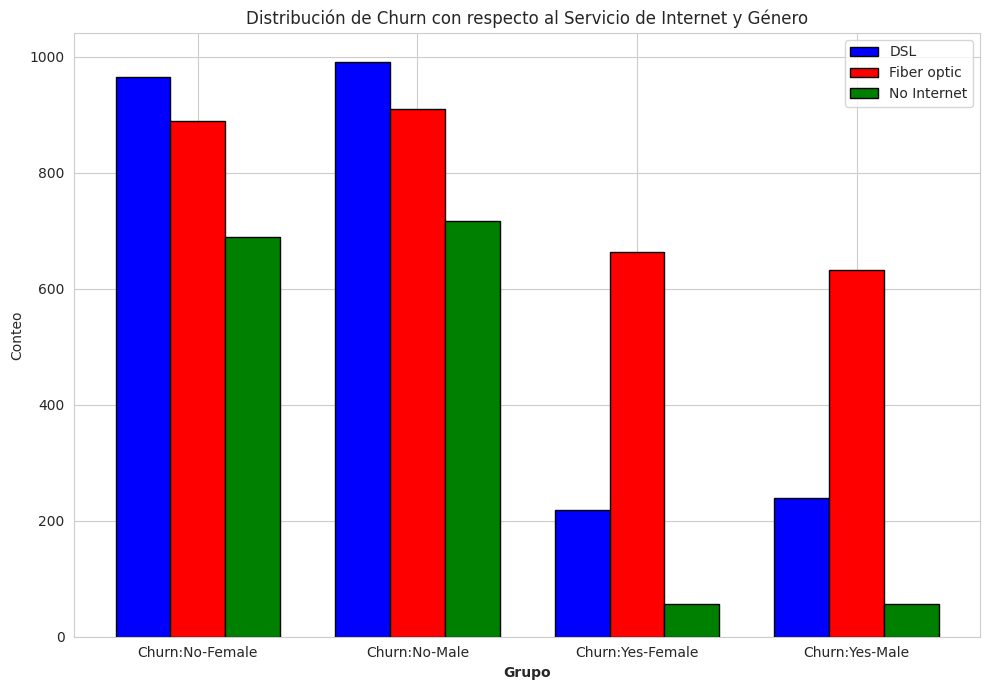

In [ ]:

# Datos
labels = ['Churn:No-Female', 'Churn:No-Male', 'Churn:Yes-Female', 'Churn:Yes-Male']
dsl_counts = [965, 992, 219, 240]
fiber_optic_counts = [889, 910, 664, 633]
no_internet_counts = [690, 717, 56, 57]

# Creación de barras
bar_width = 0.25
r1 = range(len(dsl_counts))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 7))

# Barras
plt.bar(r1, dsl_counts, color='b', width=bar_width, edgecolor='black', label='DSL')
plt.bar(r2, fiber_optic_counts, color='r', width=bar_width, edgecolor='black', label='Fiber optic')
plt.bar(r3, no_internet_counts, color='g', width=bar_width, edgecolor='black', label='No Internet')

# Etiquetas
plt.xlabel('Grupo', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(dsl_counts))], labels)
plt.ylabel('Conteo')
plt.title('Distribución de Churn con respecto al Servicio de Internet y Género')

plt.legend()
plt.tight_layout()
plt.show()


* Muchos clientes eligen el servicio de Fibra óptica y también es evidente que aquellos que utilizan este servicio tienen una alta tasa de abandono. Esto podría sugerir insatisfacción con este tipo de servicio de internet.

* Los clientes con servicio DSL son la mayoría y tienen una tasa de abandono menor en comparación con el servicio de Fibra óptica."

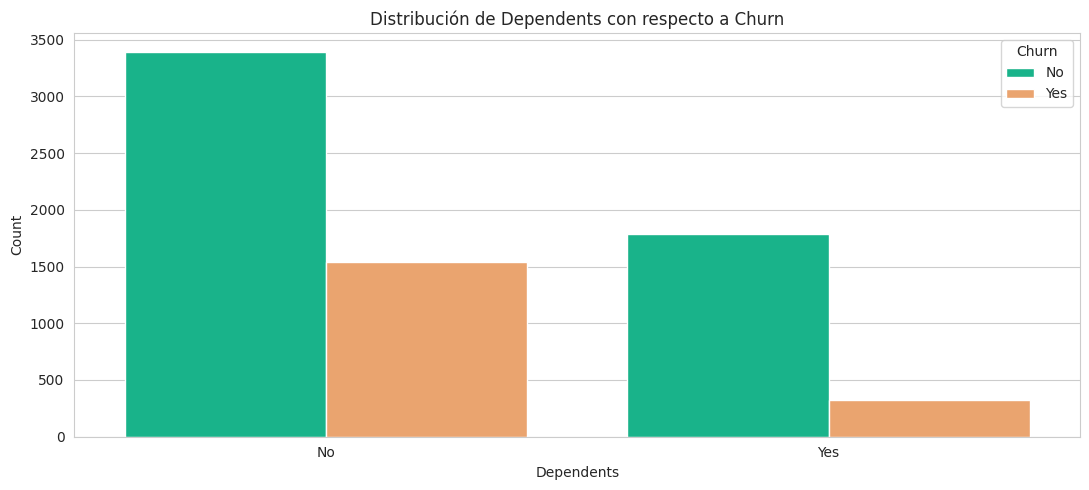

In [ ]:
# Establece el tamaño del gráfico
plt.figure(figsize=(11, 5))

# Crea el histograma utilizando seaborn
sns.countplot(x='Dependents', hue='Churn', data=df, palette=['#00CC96', '#FFA15A'])

# Añade el título y las etiquetas
plt.title('Distribución de Dependents con respecto a Churn')
plt.xlabel('Dependents')
plt.ylabel('Count')

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [ ]:
print(f'Un cliente con dependientes tiene una probabilidad del {round(df[(df["Dependents"] == "Yes") & (df["Churn"] == "Yes")].count()[0] / df[(df["Dependents"] == "Yes")].count()[0] *100,2)} % abandonar')

print(f'Un cliente sin dependientes tiene una probabilidad del {round(df[(df["Dependents"] == "No") & (df["Churn"] == "Yes")].count()[0] / df[(df["Dependents"] == "No")].count()[0]*100,2)} % abandonar')

Un cliente con dependientes tiene una probabilidad del 15.45 % abandonar
Un cliente sin dependientes tiene una probabilidad del 31.28 % abandonar


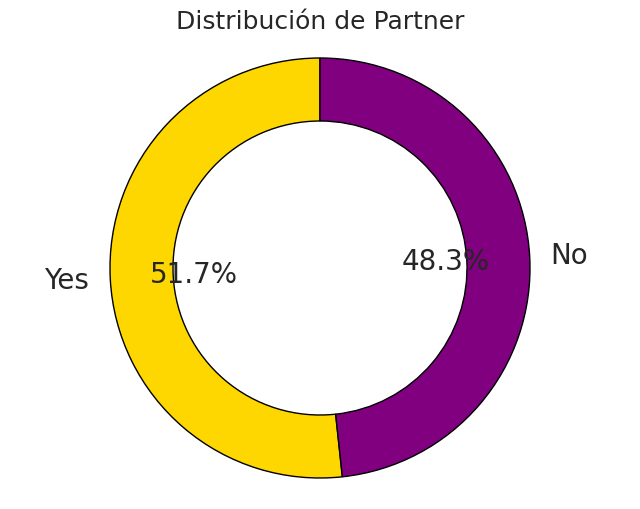

In [ ]:

# Datos
labels = df['Partner'].unique()
values = df['Partner'].value_counts()
colors = ['gold', 'purple']

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico circular
wedges, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3, edgecolor='black'))

# Ajustes estéticos
ax.axis('equal')  # Para que el gráfico sea circular
plt.setp(autotexts, size=20)  # Tamaño del texto automático (porcentajes)
plt.setp(texts, size=20)  # Tamaño de las etiquetas

# Título
plt.title('Distribución de Partner', fontsize=18)

# Mostrar el gráfico
plt.show()


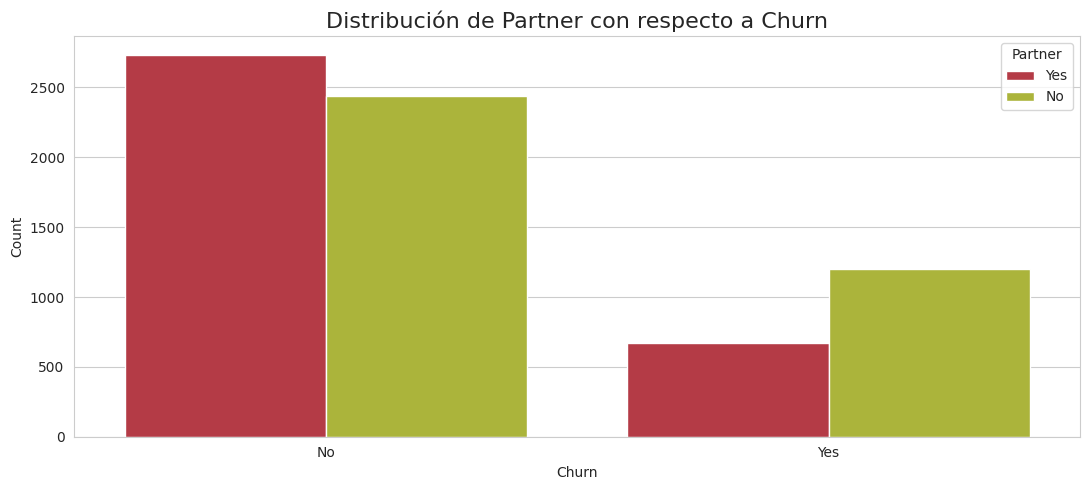

In [ ]:

# Asegurarse que los datos están en formato adecuado
df['Churn'] = df['Churn'].astype(str)
df['Partner'] = df['Partner'].astype(str)

# Establecer el tamaño y estilo del gráfico
plt.figure(figsize=(11,5))
sns.set_style("whitegrid")

# Crear el histograma
sns.countplot(x="Churn", hue="Partner", data=df, palette=['#C82735','#BCC827'])

# Añadir títulos y etiquetas
plt.title('Distribución de Partner con respecto a Churn', fontsize=16)
plt.ylabel('Count') # Puedes cambiar 'Count' por 'Conteo' si prefieres
plt.xlabel('Churn')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
probabilidad_con_pareja = round(df[(df["Partner"] == "Yes") & (df["Churn"] == "Yes")].count()[0] / df[(df["Partner"] == "Yes")].count()[0] * 100, 2)
probabilidad_sin_pareja = round(df[(df["Partner"] == "No") & (df["Churn"] == "Yes")].count()[0] / df[(df["Partner"] == "No")].count()[0] * 100, 2)

print(f'Un cliente con pareja tiene una probabilidad del {probabilidad_con_pareja} % de cambiar de compañía.')
print(f'Un cliente sin pareja tiene una probabilidad del {probabilidad_sin_pareja} % de cambiar de compañía.')


Un cliente con pareja tiene una probabilidad del 19.66 % de cambiar de compañía.
Un cliente sin pareja tiene una probabilidad del 32.96 % de cambiar de compañía.


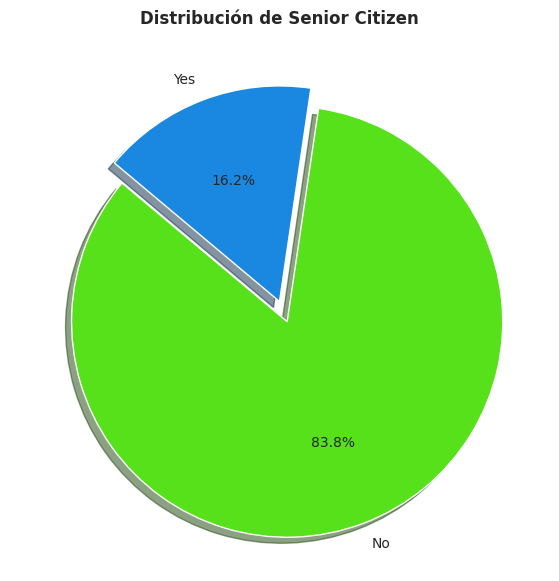

In [ ]:


# Preparación de los datos
labels = ['No', 'Yes']
sizes = df['SeniorCitizen'].value_counts()
colors = ['#56E11A', '#1A87E1']
explode = (0.1, 0)  # explode 1st slice for emphasis

# Crear el gráfico de pie
plt.figure(figsize=(10, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Distribución de Senior Citizen', fontweight='bold')
plt.show()


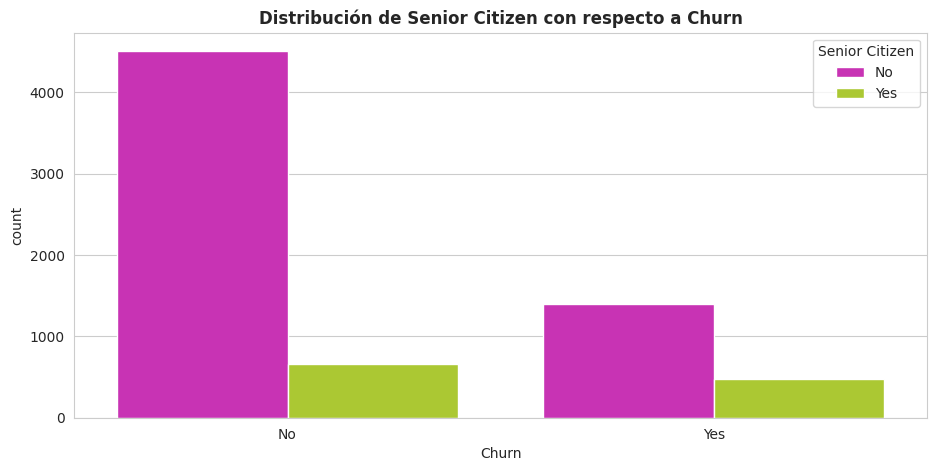

In [ ]:


# Configurar tamaño y estilo del gráfico
plt.figure(figsize=(11, 5))
sns.set_style("whitegrid")

# Crear el histograma
sns.countplot(data=df, x='Churn', hue='SeniorCitizen', palette=['#E11AC6','#BAE11A'])

# Configurar título y leyenda
plt.title('Distribución de Senior Citizen con respecto a Churn', fontweight='bold')
plt.legend(title='Senior Citizen', labels=['No', 'Yes'])

# Mostrar el gráfico
plt.show()


In [ ]:
print(f'Un cliente que es un ciudadano mayor tiene una probabilidad del {round(df[(df["SeniorCitizen"] == 1) & (df["Churn"] == "Yes")].count()[0] / df[(df["SeniorCitizen"] == 1)].count()[0] *100,2)} % de dar de baja el servicio.')

print(f'Un cliente que no es un ciudadano mayor tiene una probabilidad del {round(df[(df["SeniorCitizen"] == 0) & (df["Churn"] == "Yes")].count()[0] / df[(df["SeniorCitizen"] == 0)].count()[0]*100,2)} % de dar de baja el servicio.')


Un cliente que es un ciudadano mayor tiene una probabilidad del 41.68 % de dar de baja el servicio.
Un cliente que no es un ciudadano mayor tiene una probabilidad del 23.61 % de dar de baja el servicio.


* Se puede observar que la proporción de ciudadanos mayores es muy baja.

* Probablemente el 42% de los ciudadanos mayores optan por dar de baja el servicio.

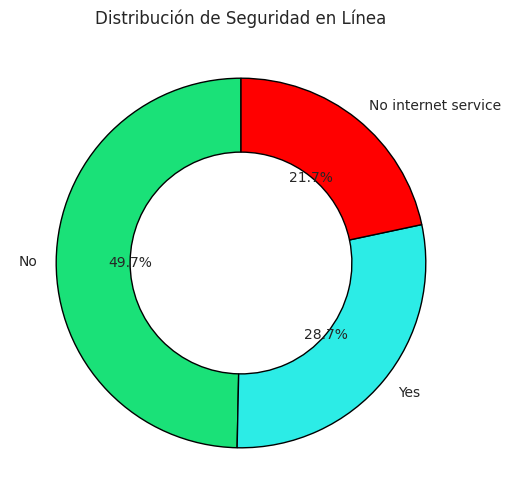

In [ ]:

# Valores y conteos
labels = df['OnlineSecurity'].unique()
values = df['OnlineSecurity'].value_counts().values

# Colores
colors = ['#1AE178', '#2CECE6', 'red']

# Creación del gráfico de pastel
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4, edgecolor='black'))
ax.set_title('Distribución de Seguridad en Línea')

plt.show()


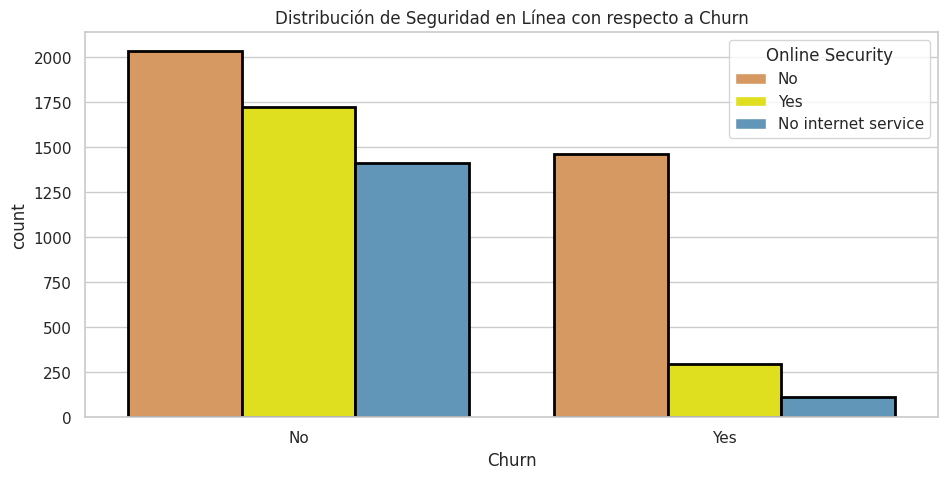

In [ ]:
# Establecer el estilo y tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(11, 5))

# Crear el gráfico
ax = sns.countplot(x="Churn", hue="OnlineSecurity", data=df, palette=['#EB984E','yellow', '#5499C7'])

# Configurar título y leyenda
ax.set_title('Distribución de Seguridad en Línea con respecto a Churn')
ax.legend(title='Online Security', loc='upper right')

# Añadir líneas alrededor de las barras
for p in ax.patches:
    p.set_edgecolor('black')
    p.set_linewidth(2)

plt.show()

In [ ]:
print(f'Un cliente con seguridad en línea tiene una probabilidad del {round(df[(df["OnlineSecurity"] == "Yes") & (df["Churn"] == "Yes")].count()[0] / df[(df["OnlineSecurity"] == "Yes")].count()[0] *100,2)} % de abandonar el servicio.')

print(f'Un cliente sin seguridad en línea tiene una probabilidad del {round(df[(df["OnlineSecurity"] == "No") & (df["Churn"] == "Yes")].count()[0] / df[(df["OnlineSecurity"] == "No")].count()[0]*100,2)} % de abandonar el servicio.')

print(f'Un cliente sin servicio de internet tiene una probabilidad del {round(df[(df["OnlineSecurity"] == "No internet service") & (df["Churn"] == "Yes")].count()[0] / df[(df["OnlineSecurity"] == "No internet service")].count()[0]*100,2)} % de abandonar el servicio.')


Un cliente con seguridad en línea tiene una probabilidad del 14.61 % de abandonar el servicio.
Un cliente sin seguridad en línea tiene una probabilidad del 41.77 % de abandonar el servicio.
Un cliente sin servicio de internet tiene una probabilidad del 7.4 % de abandonar el servicio.


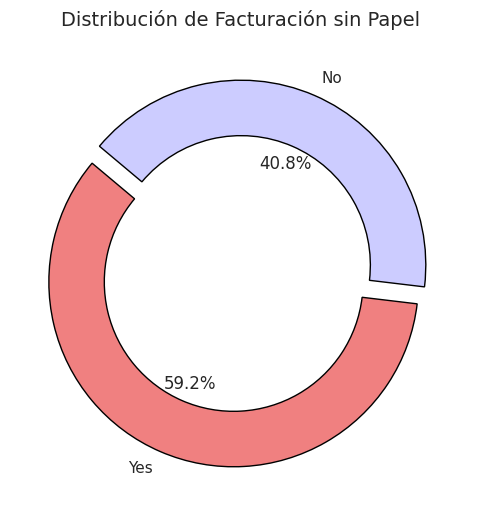

In [ ]:


# Contamos las ocurrencias de cada valor único
value_counts = df['PaperlessBilling'].value_counts()
labels = value_counts.index
sizes = value_counts.values
colors = ['LightCoral', '#CCCCFF']
explode = (0.1, 0)  # explode 1st slice for emphasis

# Crear el gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3, edgecolor='black'))
plt.title('Distribución de Facturación sin Papel', fontsize=14)
plt.show()


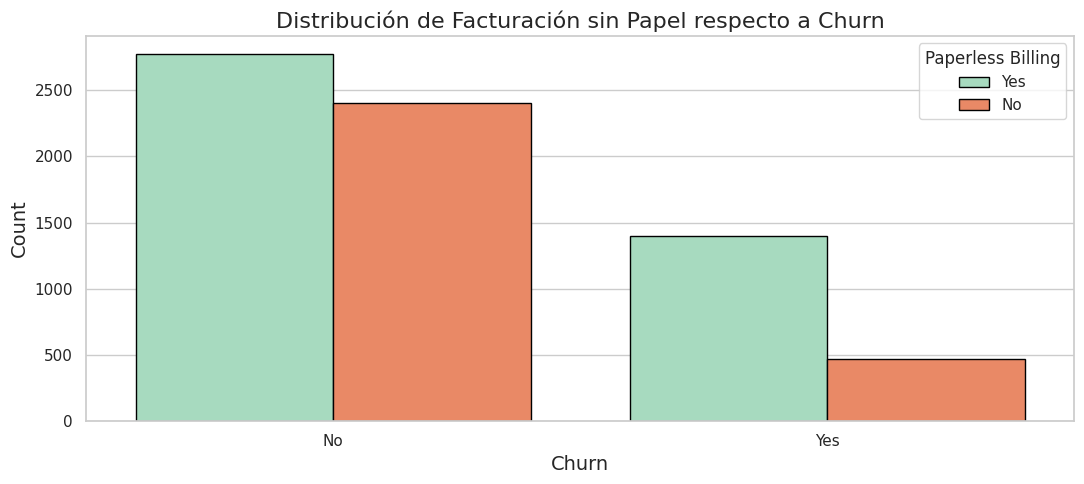

In [ ]:


# Configurar estilos de Seaborn y figura
sns.set_style("whitegrid")
plt.figure(figsize=(11, 5))

# Crear el countplot
sns.countplot(x='Churn', hue='PaperlessBilling', data=df, palette=['#9FE2BF', '#FF7F50'], edgecolor='black')

# Establecer título y etiquetas
plt.title('Distribución de Facturación sin Papel respecto a Churn', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Paperless Billing')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
# Calculate churn percentages for customers with and without PaperlessBilling
paperless_churn_percentage = round(df[(df["PaperlessBilling"] == "Yes") & (df["Churn"] == "Yes")].shape[0] / df[df["PaperlessBilling"] == "Yes"].shape[0] * 100, 2)
non_paperless_churn_percentage = round(df[(df["PaperlessBilling"] == "No") & (df["Churn"] == "Yes")].shape[0] / df[df["PaperlessBilling"] == "No"].shape[0] * 100, 2)

# Print the results
print(f'Una cliente con PaperlessBilling tiene una probabilidad de {paperless_churn_percentage} % abandonar')
print(f'Un cliente sin PaperlessBilling tiene una probabilidad de {non_paperless_churn_percentage} % abandonar')


Una cliente con PaperlessBilling tiene una probabilidad de 33.57 % abandonar
Un cliente sin PaperlessBilling tiene una probabilidad de 16.33 % abandonar


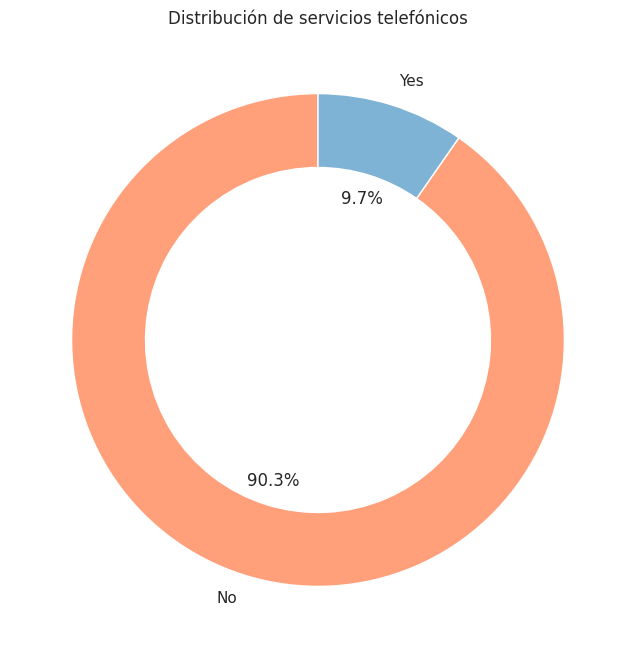

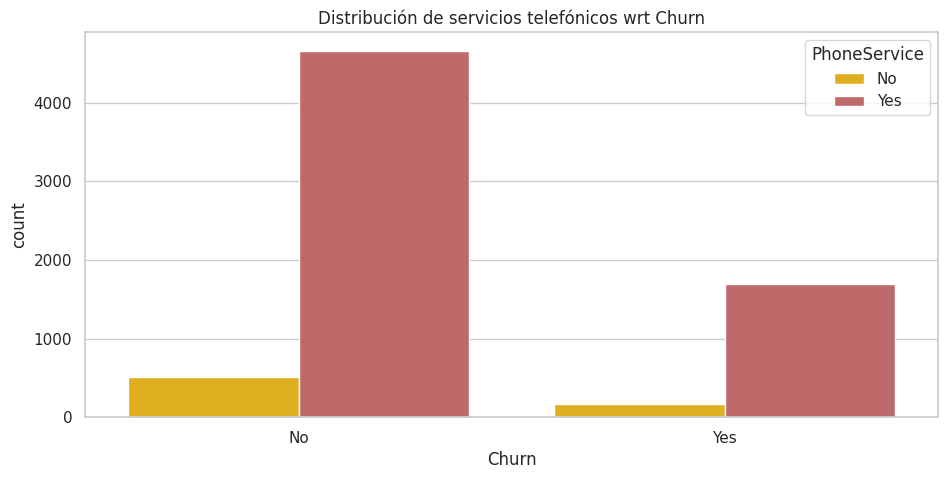

In [ ]:
# 1. Pie chart
labels = df['PhoneService'].unique()
values = df['PhoneService'].value_counts()
colors = ['LightSalmon', '#7FB3D5']

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Distribución de servicios telefónicos')
plt.show()

# 2. Histogram
plt.figure(figsize=(11, 5))
sns.countplot(x='Churn', hue='PhoneService', data=df, palette=['#FFBF00', 'IndianRed'])
plt.title('Distribución de servicios telefónicos wrt Churn')
plt.show()

In [ ]:
# Customers with phone service
churn_with_service = df[(df["PhoneService"] == "Yes") & (df["Churn"] == "Yes")].shape[0]
total_with_service = df[df["PhoneService"] == "Yes"].shape[0]
churn_prob_with_service = (churn_with_service / total_with_service) * 100

print(f'Un cliente con servicio telefónico tiene una probabilidad de {round(churn_prob_with_service, 2)}% churn')

# Customers without phone service
churn_without_service = df[(df["PhoneService"] == "No") & (df["Churn"] == "Yes")].shape[0]
total_without_service = df[df["PhoneService"] == "No"].shape[0]
churn_prob_without_service = (churn_without_service / total_without_service) * 100

print(f'Un cliente sin servicio telefónico tiene una probabilidad de {round(churn_prob_without_service, 2)}% churn')


Un cliente con servicio telefónico tiene una probabilidad de 26.71% churn
Un cliente sin servicio telefónico tiene una probabilidad de 24.93% churn


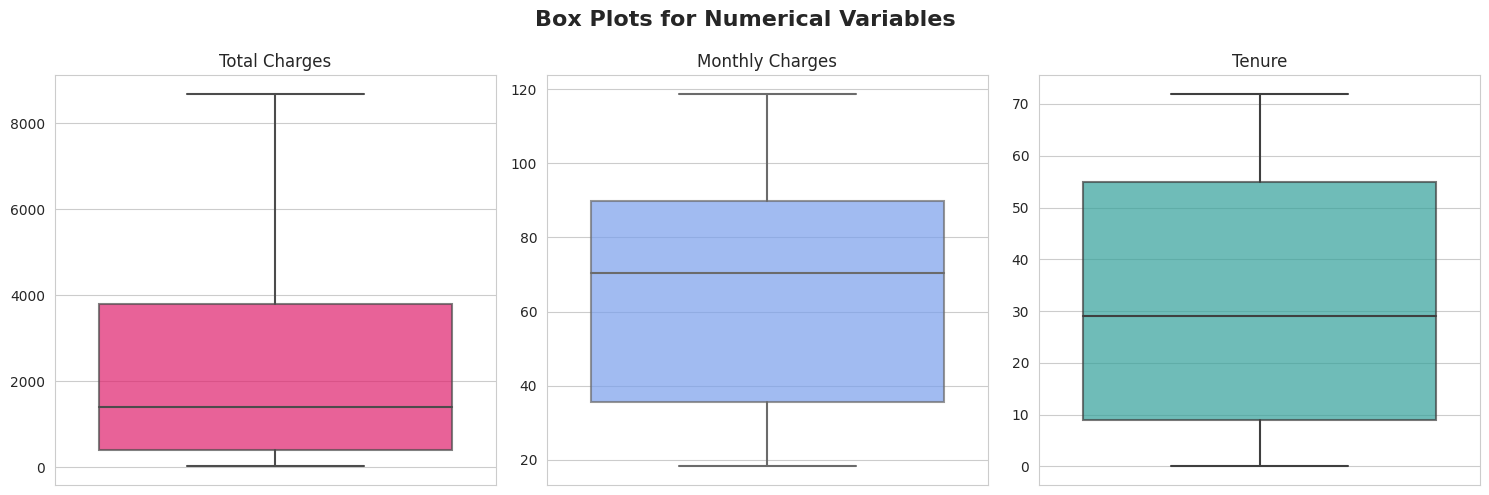

In [ ]:

# Establecer el estilo de Seaborn
sns.set_style("whitegrid")

# Crear una figura y ejes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot para 'MonthlyCharges'
sns.boxplot(y=df['MonthlyCharges'], ax=ax[1], color='#6699ff', boxprops=dict(alpha=.7))
ax[1].set_title('Monthly Charges')
ax[1].set_ylabel('')  # Eliminar la etiqueta del eje y para una visualización más limpia

# Boxplot para 'TotalCharges'
sns.boxplot(y=df['TotalCharges'], ax=ax[0], color='#ff0066', boxprops=dict(alpha=.7))
ax[0].set_title('Total Charges')
ax[0].set_ylabel('')  # Eliminar la etiqueta del eje y para una visualización más limpia

# Boxplot para 'tenure'
sns.boxplot(y=df['tenure'], ax=ax[2], color='lightseagreen', boxprops=dict(alpha=.7))
ax[2].set_title('Tenure')
ax[2].set_ylabel('')  # Eliminar la etiqueta del eje y para una visualización más limpia

# Título general
fig.suptitle('Box Plots for Numerical Variables', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Ajustar el espacio en la parte superior para el título
plt.show()


* Los clientes con cargos mensuales más altos tienen más probabilidades de abandonar.
* Los clientes con cargos totales más altos tienen más probabilidades de abandonar.
* Los clientes que permanecieron en la empresa durante más tiempo tienen menos probabilidades de abandonar ahora.

Encontrar alguna categoria rara :

In [4]:
#Lista con los nombres de todas las columnas del DataFrame que tienen un tipo de dato 'O' o, dicho de otra manera, son columnas de tipo object.
categorical = [var for var in df.columns if df[var].dtype=='O']

# salida que muestra la proporción de cada etiqueta única en todas las columnas categóricas del DataFrame.
for var in categorical:
    print(df[var].value_counts() / np.float(len(df)))
    print()


7590-VHVEG    0.000142
3791-LGQCY    0.000142
6008-NAIXK    0.000142
5956-YHHRX    0.000142
5365-LLFYV    0.000142
                ...   
9796-MVYXX    0.000142
2637-FKFSY    0.000142
1552-AAGRX    0.000142
4304-TSPVK    0.000142
3186-AJIEK    0.000142
Name: customerID, Length: 7043, dtype: float64

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64

No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64

No                     0.438450
Yes                    0.344881
N

Según lo expuesto en los datos anteriores, no se encuentra ninguna categoría rara en las variables categóricas, ya que los porcentajes de participación se hallan en valores aceptables. Adicionalmente, contamos con un amplio número de observaciones.

In [ ]:
#Replace Male with 1 or Female with 0
df.gender = [1 if each == "Male" else 0 for each in df.gender]

#coloms = ['Partner', 'Dependents',  'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'PaperlessBilling', 'Churn']

#for item in coloms:
    #df[item] = [1 if each == "Yes" else 0 if each == "No" else 0 for each in df[item]]


Limpieza de datos

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#def convert_to_buckets(tenure):

   # if tenure <=24:
        #return '0 - 24 months'
   # elif tenure <=36:
        #return '24 - 36 months'
   # elif tenure <=48:
        #return '36 - 48 months'
   # elif tenure <=60:
        #return '48 - 60 months'
    #else:
        #return '> 60 months'

In [ ]:
#df['tenure']=df['tenure'].map(convert_to_buckets)
#df['tenure'].value_counts()

0 - 24 months     3210
> 60 months       1407
24 - 36 months     832
48 - 60 months     832
36 - 48 months     762
Name: tenure, dtype: int64

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
cols=df.columns
cols=cols.drop(['customerID','MonthlyCharges','TotalCharges'])
all_cat_cols=list(cols)

In [ ]:
all_cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for col in all_cat_cols:
    df[col] = labelencoder.fit_transform(df[col])


df[all_cat_cols].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,1


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.6,1


Analisis Graficos y exploratorio

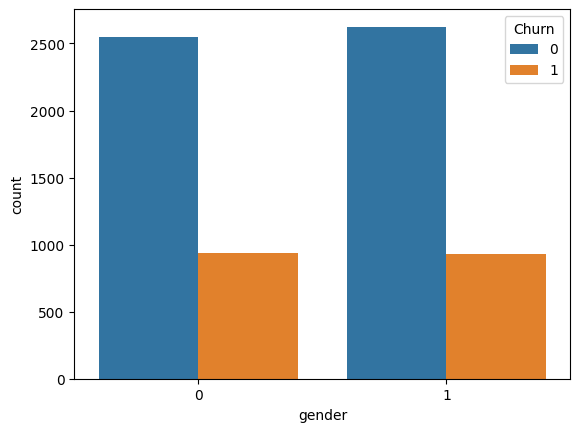

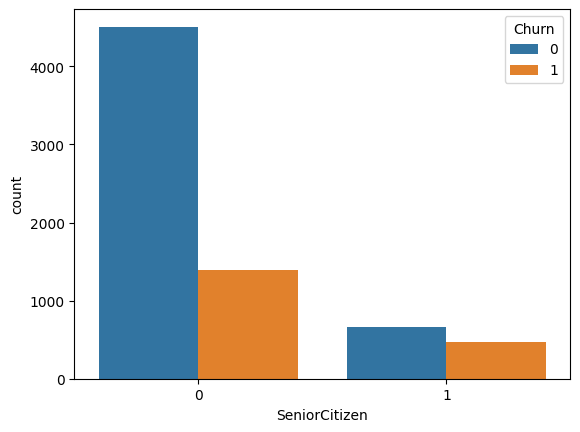

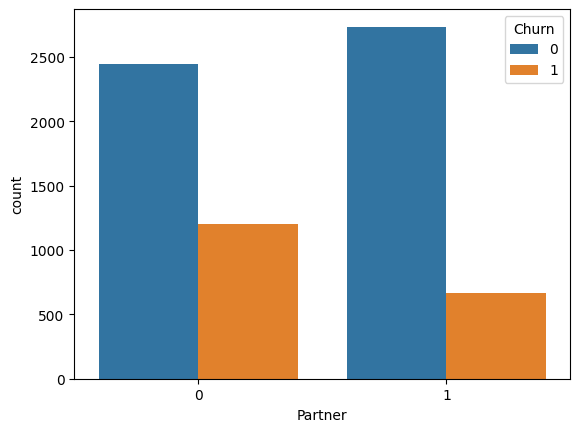

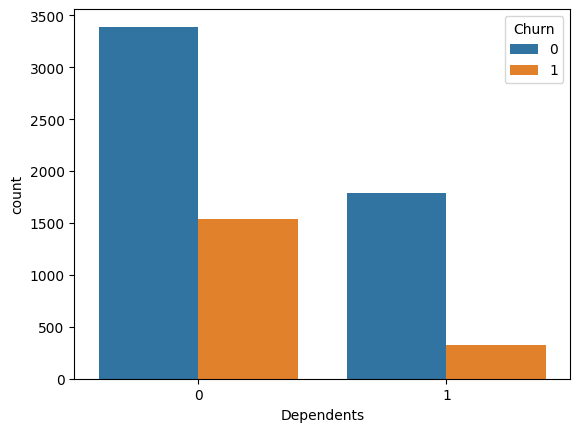

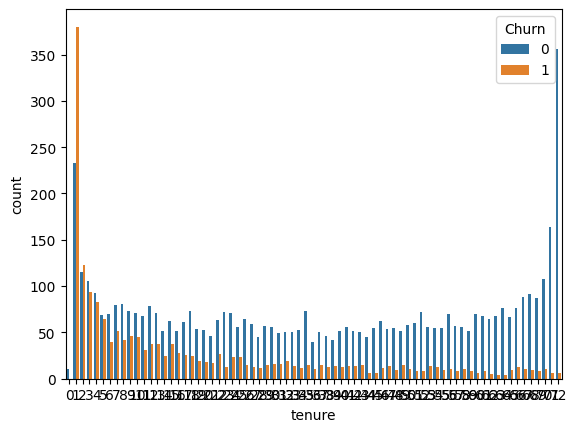

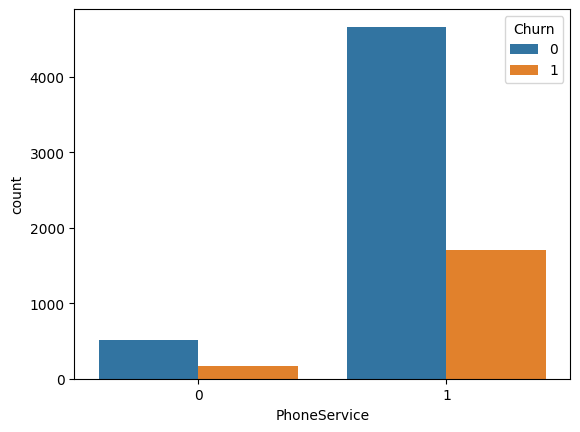

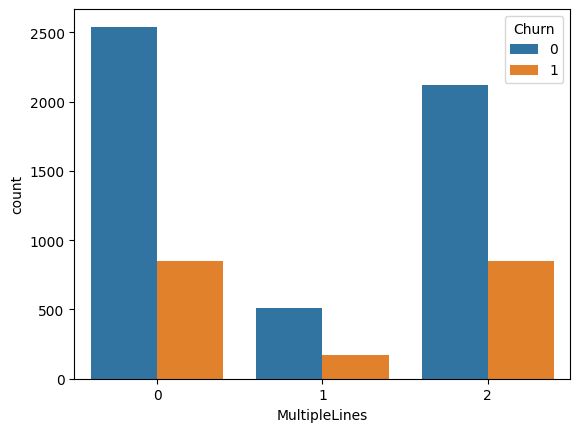

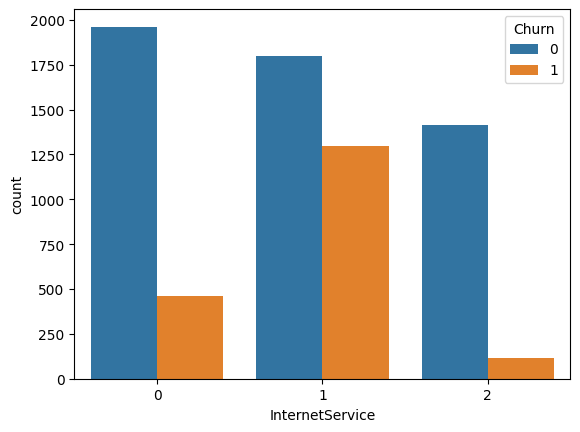

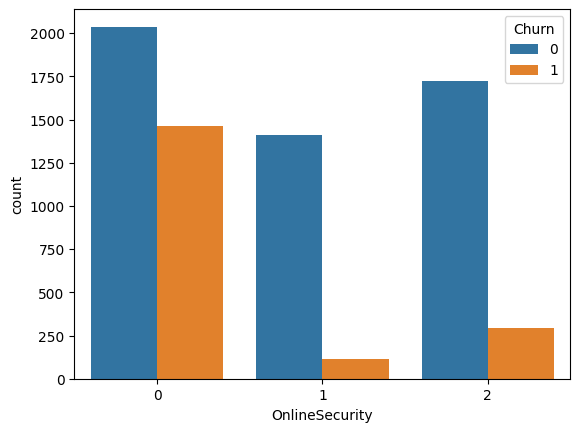

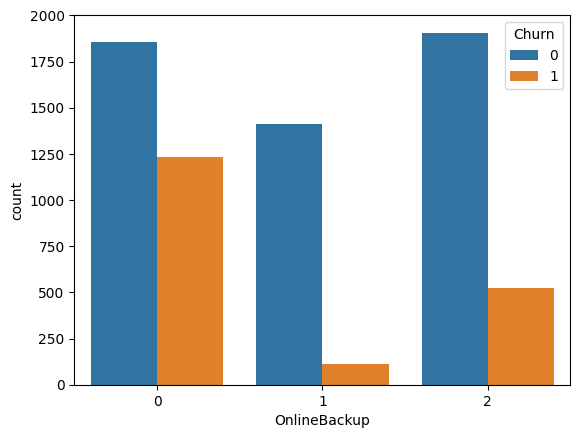

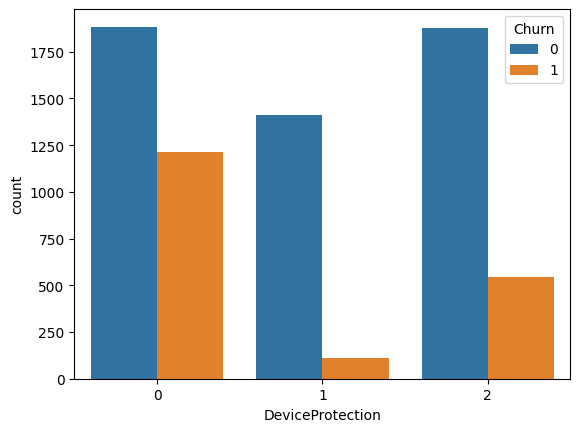

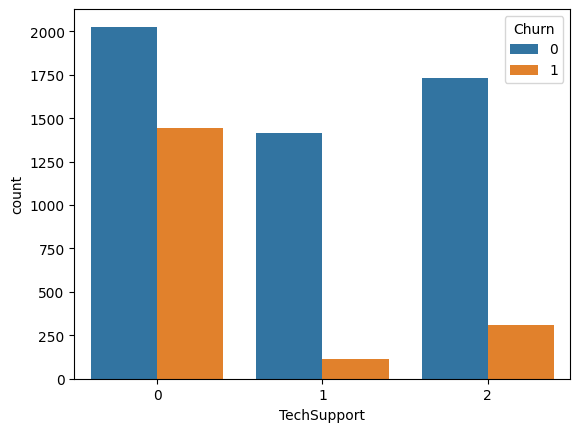

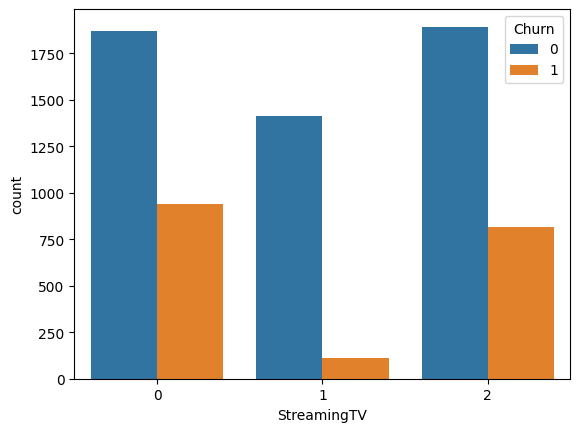

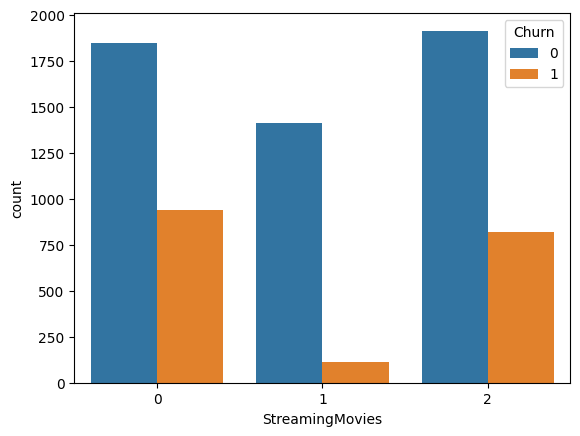

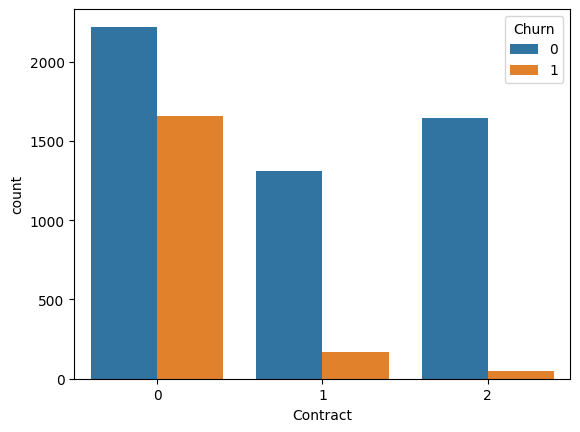

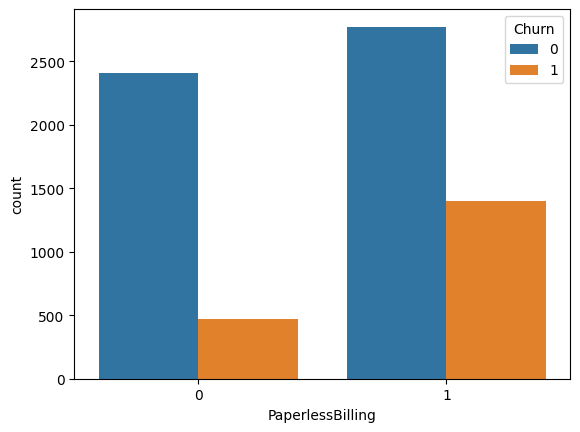

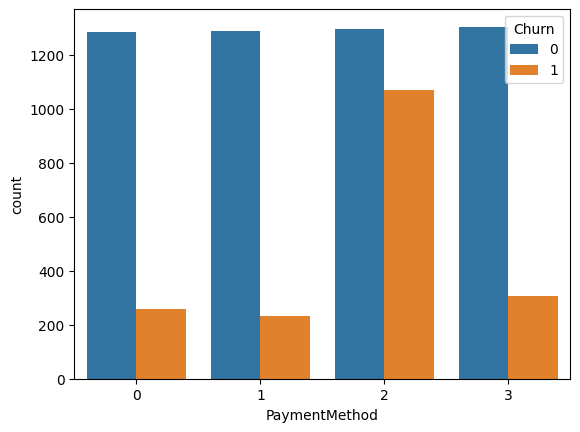

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df=df.drop(labels=['customerID'],axis=1)

for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

<Axes: >

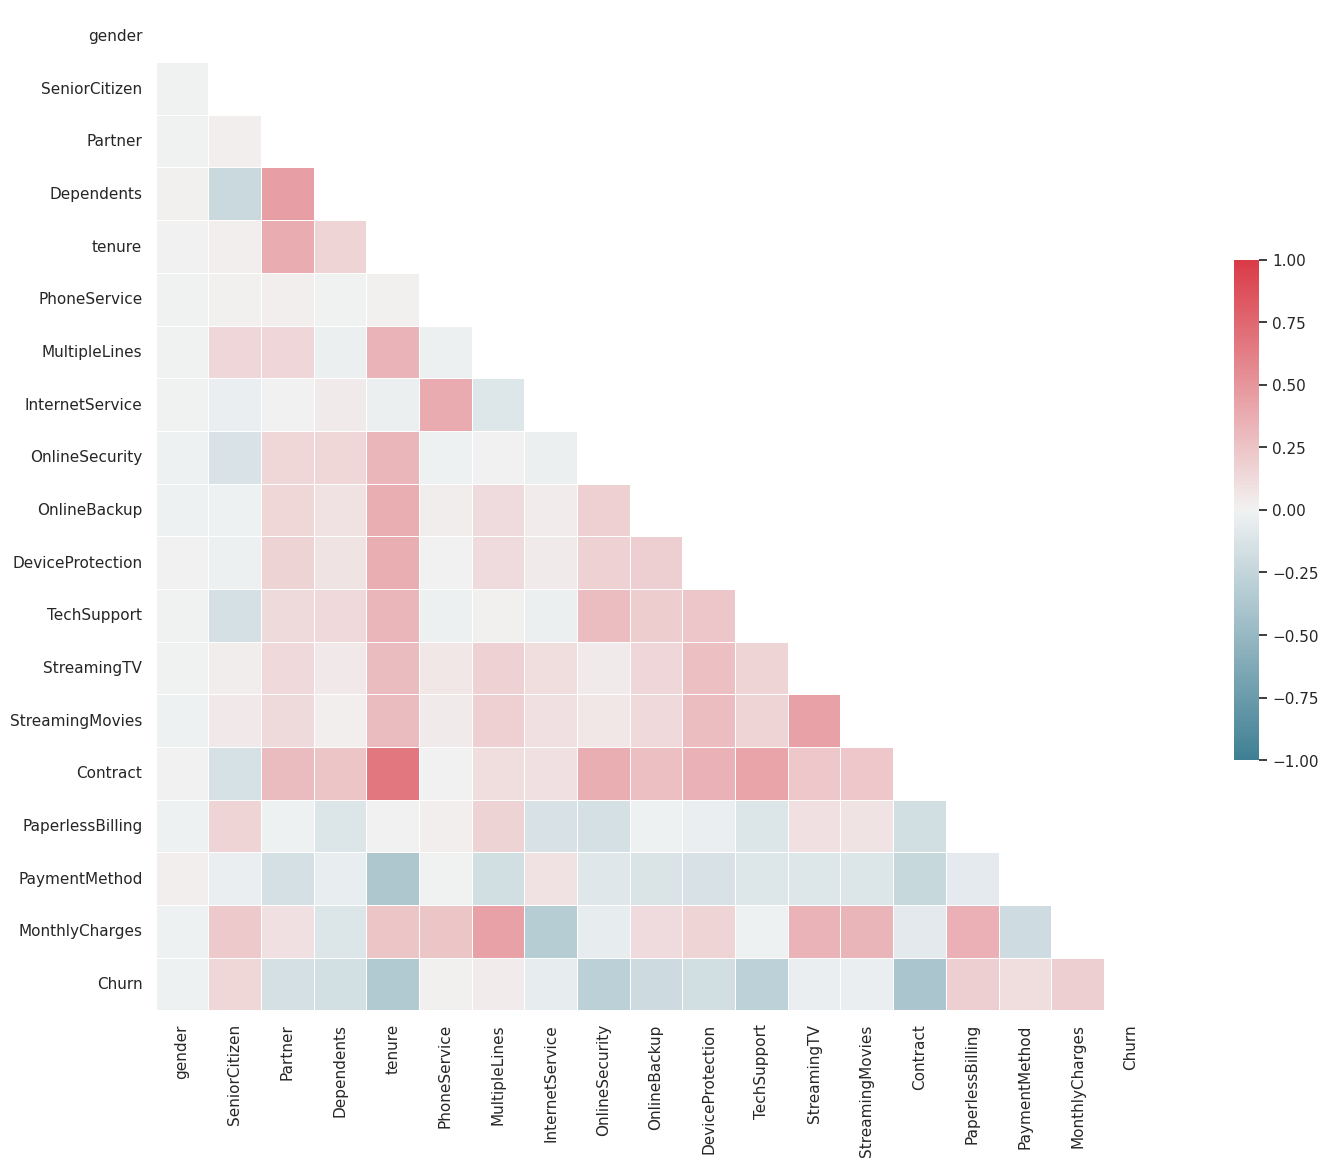

In [ ]:
#Calculate the correlation
dat = df
corr1 = dat.corr(numeric_only=True)

#change sns style
sns.set(style="white")


## Plotting Diagonal correlation
# Generate a mask for the upper triangle
mask = np.zeros_like(corr1, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set figure size
plt.subplots(figsize=(20,13))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmin = -1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})

<function matplotlib.pyplot.show(close=None, block=None)>

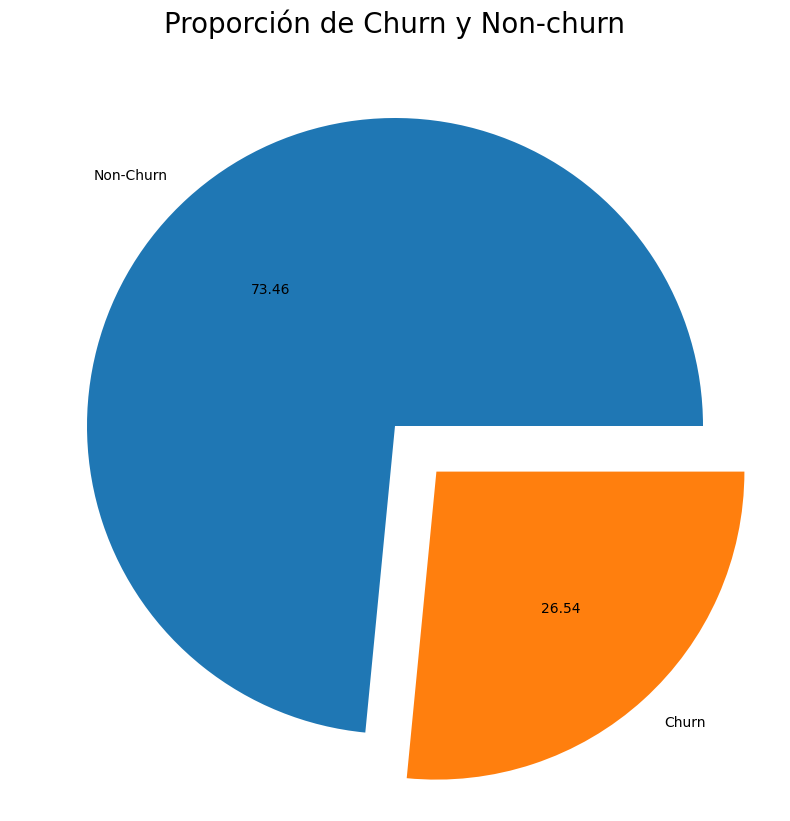

In [ ]:
#create a list
Churn = [df.Churn[df['Churn']==0].count(), df.Churn[df['Churn']==1].count()]

#set figure size
plt.subplots(figsize = (10,10))

#title
plt.title('Proporción de Churn y Non-churn', size = 20)

#plot the proportion
plt.pie(Churn, labels=['Non-Churn','Churn'], autopct = '%.2f', explode = (0, 0.2))
plt.show

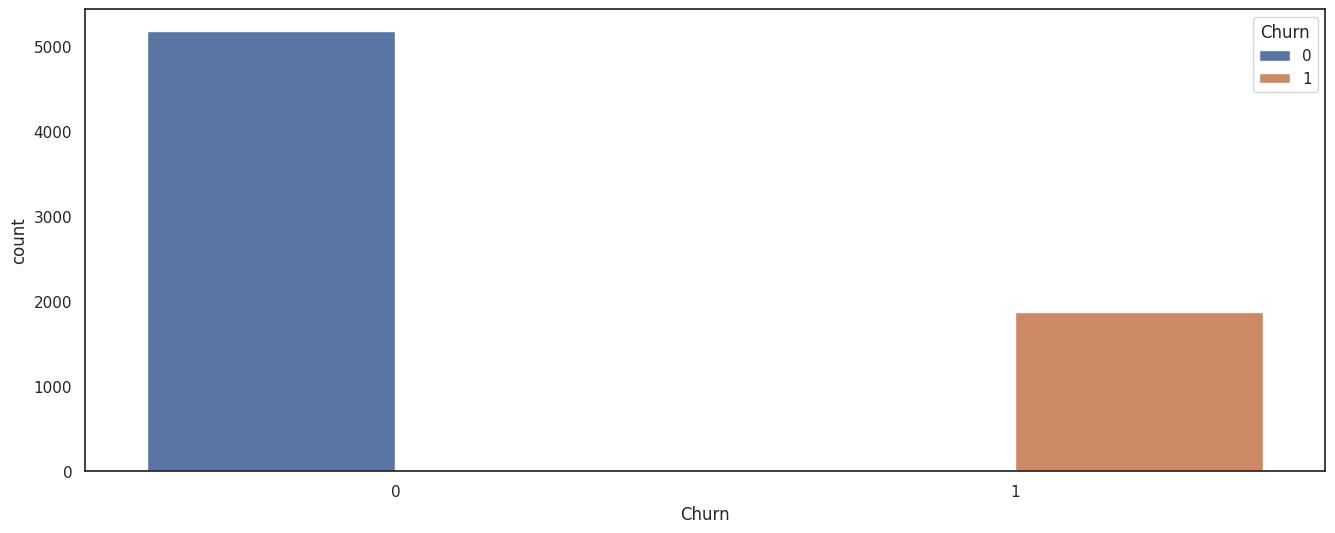

In [ ]:
plt.figure(figsize=(16, 6))
ab = sns.countplot(x="Churn",data=df,hue = df['Churn'])

In [ ]:
# balance data

X = df.drop(['Churn'], axis = 1)
y = df['Churn']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train.shape, X_test.shape

((6338, 19), (705, 19))

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalCharges','MonthlyCharges','tenure']] = scaler.fit_transform(X_train[['TotalCharges','MonthlyCharges','tenure']])
X_test[['TotalCharges','MonthlyCharges','tenure']] = scaler.transform(X_test[['TotalCharges','MonthlyCharges','tenure']])

In [ ]:
# Modeling and Parameter Optimization

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [ ]:
RF_S = RandomForestClassifier(random_state = 42)
params_RF = {'n_estimators': list(range(50,100)), 'min_samples_leaf': list(range(1,5)), 'min_samples_split': list(range(1,5))}
grid_RF = RandomizedSearchCV(RF_S, param_distributions=params_RF, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_RF.fit(X_train, y_train)
print('Best parameters:', grid_RF.best_estimator_)

Best parameters: RandomForestClassifier(min_samples_leaf=4, n_estimators=96, random_state=42)


In [ ]:
RF = RandomForestClassifier(n_estimators=70, random_state=42)
cross_val_RF_Acc = cross_val_score(RF, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_RF_f1 = cross_val_score(RF, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_RF_AUC = cross_val_score(RF, X_train, y_train, cv = CV, scoring = 'roc_auc')

In [ ]:
mean_accuracy = np.mean(cross_val_RF_Acc)
mean_f1_score = np.mean(cross_val_RF_f1)
mean_auc = np.mean(cross_val_RF_AUC)

print("Promedio de precisión (accuracy):", mean_accuracy)
print("Promedio de F1-score:", mean_f1_score)
print("Promedio de área bajo la curva ROC (AUC):", mean_auc)

Promedio de precisión (accuracy): 0.7925197223177399
Promedio de F1-score: 0.5611728559089189
Promedio de área bajo la curva ROC (AUC): 0.8259699329102297


In [ ]:
KNN_S = KNeighborsClassifier()
params_KNN = {'n_neighbors': list(range(1,20))}
grid_KNN = RandomizedSearchCV(KNN_S, param_distributions=params_KNN, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_KNN.fit(X_train, y_train)
print('Best parameters:', grid_KNN.best_estimator_)

Best parameters: KNeighborsClassifier(n_neighbors=1)


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=1)
cross_val_KNN_Acc = cross_val_score(KNN, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_KNN_f1 = cross_val_score(KNN, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_KNN_AUC = cross_val_score(KNN, X_train, y_train, cv = CV, scoring = 'roc_auc')

In [ ]:
mean_accuracy = np.mean(cross_val_KNN_Acc)
mean_f1_score = np.mean(cross_val_KNN_f1)
mean_auc = np.mean(cross_val_KNN_AUC)

print("Promedio de precisión (accuracy):", mean_accuracy)
print("Promedio de F1-score:", mean_f1_score)
print("Promedio de área bajo la curva ROC (AUC):", mean_auc)

Promedio de precisión (accuracy): nan
Promedio de F1-score: nan
Promedio de área bajo la curva ROC (AUC): nan


In [ ]:




# Construir el modelo logístico (ejemplo)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluar el modelo (ejemplo)
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)

Accuracy: 0.7877927608232789
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1041
           1       0.60      0.54      0.57       368

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest con peso de clase equilibrado
RF = RandomForestClassifier(class_weight='balanced', random_state=42)

# Entrenar el modelo
RF.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = RF.predict(X_test)

# Calcular las métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de rendimiento
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.80
Precision: 0.68
Recall: 0.46
F1-score: 0.55
Confusion Matrix:
[[954  82]
 [201 172]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Crear el modelo de Random Forest con peso de clase equilibrado
RF = RandomForestClassifier(class_weight='balanced', random_state=42)

# Entrenar el modelo
RF.fit(X_train, y_train)

# Realizar predicciones
y_pred = RF.predict(X_test)

# Calcular el F1-score
f1_score_result = f1_score(y_test, y_pred)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Crear el modelo de Random Forest con peso de clase equilibrado
RF = RandomForestClassifier(class_weight='balanced', random_state=42)

# Definir las métricas que quieres evaluar en la validación cruzada
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Realizar la validación cruzada y obtener los resultados para cada métrica
cv_results = cross_validate(RF, X, y, cv=5, scoring=scoring)

# Imprimir los resultados de cada métrica en cada iteración
print("Cross-validation Results:")
print(f"Accuracy: {cv_results['test_accuracy']}")
print(f"Precision: {cv_results['test_precision']}")
print(f"Recall: {cv_results['test_recall']}")
print(f"F1-score: {cv_results['test_f1']}")




Cross-validation Results:
Accuracy: [0.79630944 0.7920511  0.76650106 0.79119318 0.79758523]
Precision: [0.65934066 0.64835165 0.57785467 0.65863454 0.65614035]
Recall: [0.48128342 0.47326203 0.44652406 0.43967828 0.5       ]
F1-score: [0.55641422 0.54714065 0.50377074 0.52733119 0.56752656]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

lg1 = LogisticRegression(penalty='l2',solver='liblinear')
lg1.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
print('Regresión logística l2, liblinear, sin normalizar')
print(f'Train      = {lg1.score(X_train, y_train):.4}')
print(f'Test = {lg1.score(X_test, y_test):.4}')

Regresión logística l2, liblinear, sin normalizar
Train      = 0.8072
Test = 0.7921


In [ ]:
from sklearn.linear_model import LogisticRegression

lg2 = LogisticRegression(penalty='l1',solver='liblinear')
lg2.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
print('Regresión logística l1, liblinear, sin normalizar')
print(f'Train      = {lg2.score(X_train, y_train):.4}')
print(f'Test = {lg2.score(X_test, y_test):.4}')

Regresión logística l1, liblinear, sin normalizar
Train      = 0.8049
Test = 0.7921


In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,1.488002,0.903166,0.421837,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,1.611418,0.295752,0.493888,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,1.000000
